In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 16
img_height = 224
img_width = 224
epochs = 20
image_shape = (img_height, img_width, 3)
train_path = r"D:\DA\dataset\aug_waste_dataset_balance\taphuanluyen"
test_path = r"D:\DA\dataset\aug_waste_dataset_balance\tapkiemthu"

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,validation_split = 0.2)

In [4]:
train_data = train_datagen.flow_from_directory(
        train_path,
        target_size=image_shape[:2],
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical',
        subset='training',
        shuffle=True)

val_data = train_datagen.flow_from_directory(
        train_path,
        target_size=image_shape[:2],
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False) 

Found 17959 images belonging to 14 classes.
Found 4483 images belonging to 14 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

C:\Users\Admin\anaconda3\envs\mytfenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │          14,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,130,574 (72.98 MB)

 Trainable params: 19,130,574 (72.98 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [9]:
train_data.class_indices

{'batlua': 0,
 'book': 1,
 'cans': 2,
 'cardboard': 3,
 'daulocthuocla': 4,
 'glass trash': 5,
 'khautrang': 6,
 'milk_carton': 7,
 'nylon': 8,
 'paper': 9,
 'pen': 10,
 'pin': 11,
 'plastic_bottle': 12,
 'thietbidientu': 13}

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
history = model.fit(train_data,epochs=epochs,
                              validation_data=val_data,
                             callbacks=[early_stop])

Epoch 1/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 665s 590ms/step - accuracy: 0.2494 - loss: 2.2885 - val_accuracy: 0.4020 - val_loss: 1.8839
Epoch 2/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 537s 479ms/step - accuracy: 0.4379 - loss: 1.7501 - val_accuracy: 0.5057 - val_loss: 1.5831
Epoch 3/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 483s 430ms/step - accuracy: 0.5389 - loss: 1.4509 - val_accuracy: 0.5632 - val_loss: 1.3712
Epoch 4/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 492s 438ms/step - accuracy: 0.6204 - loss: 1.1763 - val_accuracy: 0.6074 - val_loss: 1.2392
Epoch 5/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 513s 457ms/step - accuracy: 0.7070 - loss: 0.9255 - val_accuracy: 0.6498 - val_loss: 1.1215
Epoch 6/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 508s 452ms/step - accuracy: 0.7810 - loss: 0.6811 - val_accuracy: 0.6723 - val_loss: 1.0638
Epoch 7/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 496s 442ms/step - accuracy: 0.8459 - loss: 0.4933 - val_accuracy: 0.6875 - val_loss: 1.0652
Epoch 8/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 524s 467ms/step - ac

In [12]:
model.save('trash_classification_1.keras')

In [13]:
losses = pd.DataFrame(model.history.history)

<Axes: >

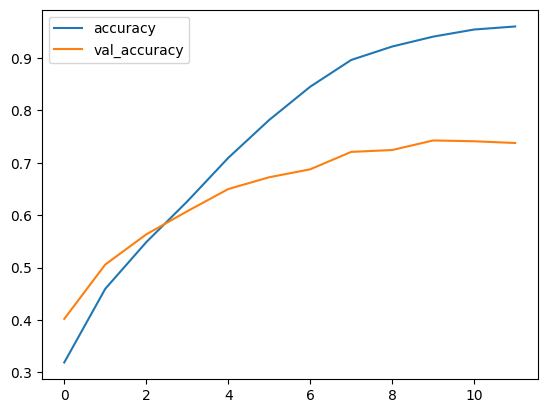

In [14]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

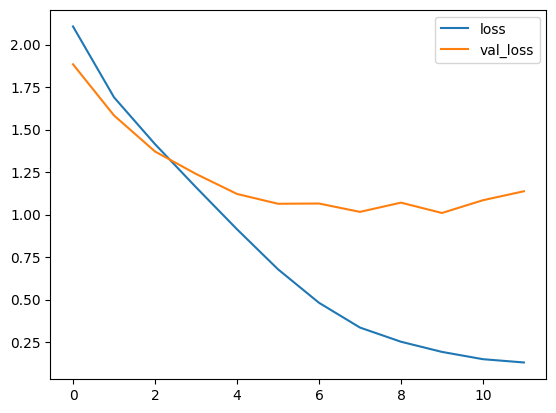

In [15]:
losses[['loss','val_loss']].plot()

In [16]:
model.metrics_names

['loss', 'compile_metrics']

In [17]:
test_data = train_datagen.flow_from_directory(
        test_path,
        target_size=image_shape[:2],
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False) 

Found 6006 images belonging to 14 classes.


In [18]:
model.evaluate(test_data)

376/376 ━━━━━━━━━━━━━━━━━━━━ 139s 371ms/step - accuracy: 0.4628 - loss: 2.9745


[2.7752556800842285, 0.5129870176315308]

In [19]:
pred_probabilities = model.predict(test_data)
predictions = np.argmax(pred_probabilities, axis=1)

376/376 ━━━━━━━━━━━━━━━━━━━━ 36s 94ms/step


In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(test_data.classes,predictions))

              precision    recall  f1-score   support

           0       0.39      0.34      0.36       484
           1       0.38      0.35      0.36       494
           2       0.50      0.51      0.51       488
           3       0.61      0.63      0.62       484
           4       0.82      0.79      0.81       486
           5       0.39      0.31      0.34       488
           6       0.58      0.77      0.66       393
           7       0.38      0.25      0.30       206
           8       0.53      0.40      0.45       321
           9       0.44      0.43      0.44       489
          10       0.53      0.54      0.53       209
          11       0.50      0.54      0.52       484
          12       0.60      0.73      0.66       492
          13       0.41      0.47      0.44       488

    accuracy                           0.51      6006
   macro avg       0.50      0.50      0.50      6006
weighted avg       0.51      0.51      0.51      6006



In [22]:
print(confusion_matrix(test_data.classes,predictions))

[[166  22  15  18   5  51  20   0  11  22  19  37  10  88]
 [ 46 173  22  52  12  14  13  10  11  62   5  33   4  37]
 [ 24  30 250  10   5  11  10  18   8  26   9  47  16  24]
 [ 22  42  14 303   5  21   9   0   8  12  11   4  20  13]
 [ 16  26   3  21 385   2   8   0   2   7   0   1   2  13]
 [ 36  30  23  20  12 150  70   2   5  20  12  19  63  26]
 [  4   4  15   3   9   3 302   2   9   7   0   0  10  25]
 [  7  12  34   6   0   2   7  51   9  19   4  23  22  10]
 [ 15  19   6  11   9  10  27   9 127  25   7  13  20  23]
 [ 19  36  30  21  19  21  12  23  23 211  10  20  23  21]
 [  5  19  14   0   0   1   7   2   7   4 113  21   9   7]
 [ 17  14  45   1   0  24  10   3  14  24   2 260  37  33]
 [  3   3  13  13   2  35   5  12   0  20   7   5 361  13]
 [ 46  31  13  20   6  37  19   1   5  19  15  38   9 229]]


<Axes: >

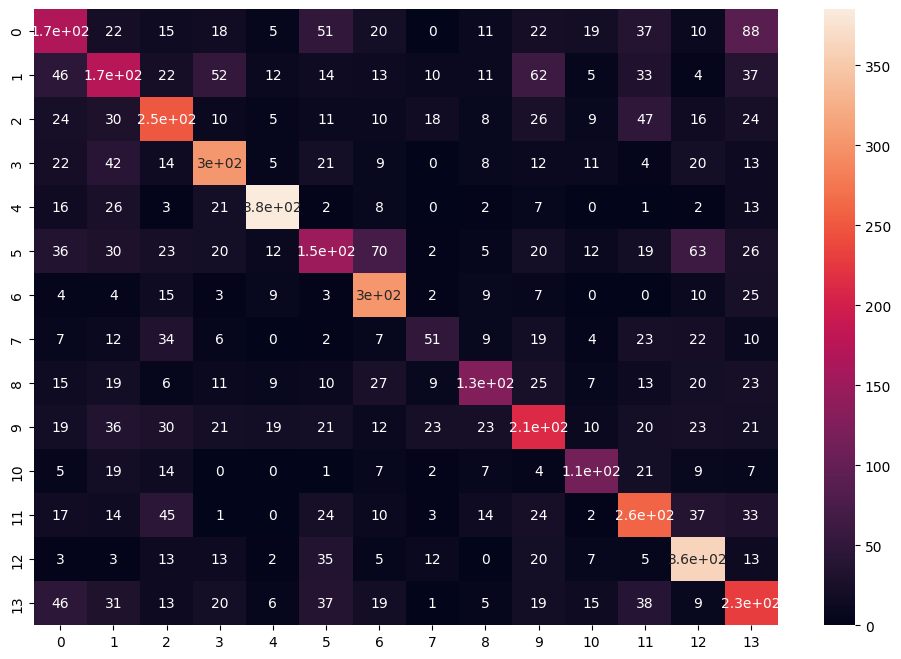

In [23]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(test_data.classes, predictions), annot=True)